In [37]:
from shapely.geometry import (
    Point,
    LineString,
    Polygon,
    MultiPoint,
    MultiLineString,
    MultiPolygon,
)
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.style.use("bmh")

In [191]:
# Point
coords = [25, 60.5]
point = gpd.GeoDataFrame({"geometry": Point(*coords)}, index=[0], crs="epsg:4326")
point_wkt = point.geometry.values[0].wkt

# MultiPoint
coords2 = [25.5, 61]
multipoint = gpd.GeoDataFrame(
    {"geometry": [MultiPoint([Point(*coords), Point(*coords2)])]},
    index=[0],
    crs="epsg:4326",
)
multipoint_wkt = multipoint.geometry.values[0].wkt

# LineString
line = gpd.GeoDataFrame(
    {"geometry": LineString([Point(24.5, 61), Point(*coords), Point(*coords2)])},
    index=[0],
    crs="epsg:4326",
)
line_geom = line.geometry.values[0]
line_wkt = line_geom.wkt

# MultiLineString
multiline = gpd.GeoDataFrame(
    {"geometry": [MultiLineString([LineString([(25, 62), (26, 62)]), line_geom])]},
    index=[0],
    crs="epsg:4326",
)
multiline_geom = multiline.geometry.values[0]
multiline_wkt = multiline_geom.wkt
# Format text so that it fits
multiline_wkt = ",\n(".join(multiline_wkt.split(", ("))

# Polygon
poly = gpd.GeoDataFrame(
    {"geometry": Polygon([Point(24.5, 61), Point(*coords), Point(*coords2)])},
    index=[0],
    crs="epsg:4326",
)
poly_geom = poly.geometry.values[0]
poly_wkt = poly_geom.wkt

# MultiPolygon with hole in the other
multipoly = gpd.GeoDataFrame(
    {
        "geometry": [
            MultiPolygon(
                [
                    Polygon(
                        [(25.6, 61), (25.6, 62), (26, 62), (26, 61)],
                        holes=[[(25.7, 61.8), (25.9, 61.8), (25.9, 61.2)]],
                    ).buffer(0),
                    poly_geom,
                ]
            )
        ]
    },
    index=[0],
    crs="epsg:4326",
)
multipoly_geom = multipoly.geometry.values[0]
multipoly_wkt = multipoly_geom.wkt
# Format text so that it fits
multipoly_wkt = ",\n(".join(multipoly_wkt.split(", (")).replace(
    "MULTIPOLYGON (", "MULTIPOLYGON (\n"
)

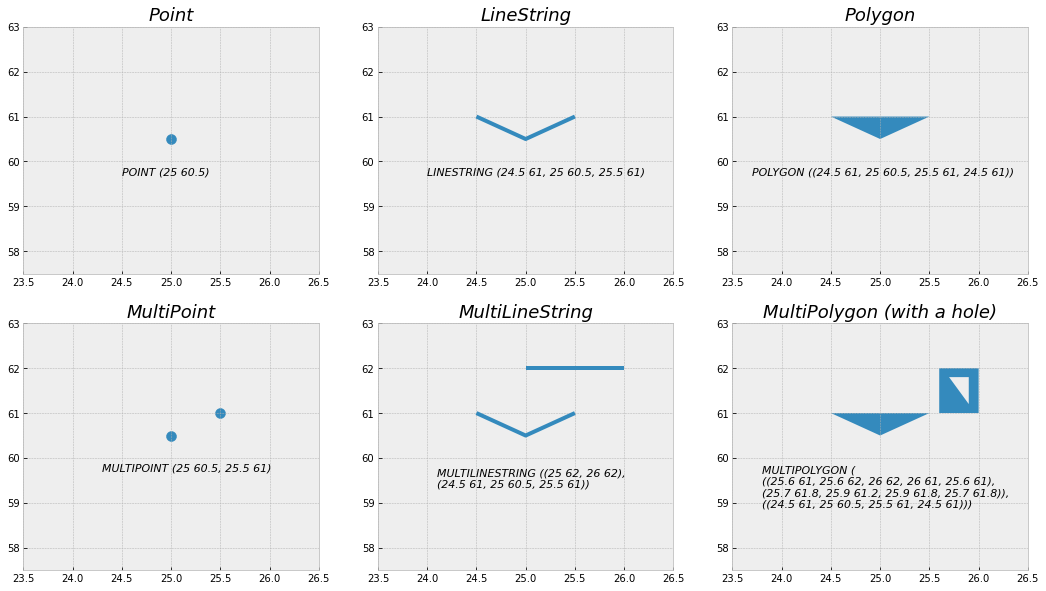

In [195]:
fix, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

markersize = 100
lw = 4

ax11 = point.plot(ax=axes[0][0], aspect=None, markersize=markersize)
ax12 = line.plot(ax=axes[0][1], aspect=None, lw=lw, ls="-", marker="*")
ax13 = poly.plot(ax=axes[0][2], aspect=None, lw=lw, facecolor="#348ABD")

ax21 = multipoint.plot(ax=axes[1][0], aspect=None, markersize=markersize)
ax22 = multiline.plot(ax=axes[1][1], aspect=None, lw=lw)
ax23 = multipoly.plot(ax=axes[1][2], aspect=None, lw=lw, facecolor="#348ABD")

# Set limits
xlims = [23.5, 26.5]
ylims = [57.5, 63]

# Xlimits
ax11.set_xlim(*xlims)
ax12.set_xlim(*xlims)
ax13.set_xlim(*xlims)
ax21.set_xlim(*xlims)
ax22.set_xlim(*xlims)
ax23.set_xlim(*xlims)

# Ylimits
ax11.set_ylim(*ylims)
ax12.set_ylim(*ylims)
ax13.set_ylim(*ylims)
ax21.set_ylim(*ylims)
ax22.set_ylim(*ylims)
ax23.set_ylim(*ylims)

# Titles
ax11.set_title("Point", fontdict=dict(size=18), style="italic")
ax12.set_title("LineString", fontdict=dict(size=18), style="italic")
ax13.set_title("Polygon", fontdict=dict(size=18), style="italic")
ax21.set_title("MultiPoint", fontdict=dict(size=18), style="italic")
ax22.set_title("MultiLineString", fontdict=dict(size=18), style="italic")
ax23.set_title("MultiPolygon (with a hole)", fontdict=dict(size=18), style="italic")

# Add WKT presentation
ax11.text(24.5, 59.7, point_wkt, fontdict=dict(size=11), style="italic")
ax12.text(24.0, 59.7, line_wkt, fontdict=dict(size=11), style="italic")
ax13.text(23.7, 59.7, poly_wkt, fontdict=dict(size=11), style="italic")
ax21.text(24.3, 59.7, multipoint_wkt, fontdict=dict(size=11), style="italic")
ax22.text(24.1, 59.35, multiline_wkt, fontdict=dict(size=11), style="italic")
ax23.text(23.8, 58.9, multipoly_wkt, fontdict=dict(size=11), style="italic")

# Save
plt.savefig("vector_data_model.jpg", dpi=300)

In [196]:
point

,geometry
0,POINT (25.00000 60.50000)
